In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

from cmdstanpy import CmdStanModel
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

# Create ./stan folder if does not exists
if not os.path.exists("/content/drive/My Drive/Bayesian/stan"):
    os.mkdir("/content/drive/My Drive/Bayesian/stan")

In [3]:
# Import data
data = pd.read_csv('/content/drive/My Drive/Bayesian/All_values_Clean.csv')
data.head(5)

Unnamed: 0  Id_sensor         Time       NOx  max_wind10  avg_wind10  \
0        7145       6204   gennaio 16  5.094537   -0.883564   -1.033000   
1        7146       6204  febbraio 16  4.847209   -0.160893   -0.054538   
2        7147       6204     marzo 16  3.911859    0.257496   -0.447750   
3        7148       6204    aprile 16  3.763297   -0.984991   -0.200262   
4        7149       6204    maggio 16  3.808000   -0.718744   -0.524298   

   max_wind100  avg_wind100  max_humidity  avg_humidity  ...  sin12  cos12  \
0    -0.448047    -0.632854      0.614262      0.775022  ...  0.500  0.866   
1     0.083888     0.459680     -0.152361      0.826117  ...  0.866  0.500   
2     0.367014    -0.273935     -0.152361      0.137046  ...  1.000  0.000   
3    -0.928504    -0.113883     -1.685606     -0.319251  ...  0.866 -0.500   
4    -0.413729    -0.419238     -0.152361     -0.147897  ...  0.500 -0.866   

    sin6  cos6  sin4  cos4   sin3 cos3        lat      lng  
0  0.866   0.5     1     0  0.866 -0.5  45.519335  9.59201  
1  0.866  -0.5     0    -1 -0.866 -0.5  45.519335  9.59201  
2  0.000  -1.0    -1     0  0.000  1.0  45.519335  9.59201  
3 -0.866  -0.5     0     1  0.866 -0.5  45.519335  9.59201  
4 -0.866   0.5     1     0 -0.866 -0.5  45.519335  9.59201  

[5 rows x 29 columns]

In [4]:
data['lnNOx']=data['NOx']
data['NOx']=np.exp(data['NOx'])
data.head()

Unnamed: 0  Id_sensor         Time         NOx  max_wind10  avg_wind10  \
0        7145       6204   gennaio 16  163.128226   -0.883564   -1.033000   
1        7146       6204  febbraio 16  127.384343   -0.160893   -0.054538   
2        7147       6204     marzo 16   49.991790    0.257496   -0.447750   
3        7148       6204    aprile 16   43.090264   -0.984991   -0.200262   
4        7149       6204    maggio 16   45.060215   -0.718744   -0.524298   

   max_wind100  avg_wind100  max_humidity  avg_humidity  ...  cos12   sin6  \
0    -0.448047    -0.632854      0.614262      0.775022  ...  0.866  0.866   
1     0.083888     0.459680     -0.152361      0.826117  ...  0.500  0.866   
2     0.367014    -0.273935     -0.152361      0.137046  ...  0.000  0.000   
3    -0.928504    -0.113883     -1.685606     -0.319251  ... -0.500 -0.866   
4    -0.413729    -0.419238     -0.152361     -0.147897  ... -0.866 -0.866   

   cos6  sin4  cos4   sin3  cos3        lat      lng     lnNOx  
0   0.5     1     0  0.866  -0.5  45.519335  9.59201  5.094537  
1  -0.5     0    -1 -0.866  -0.5  45.519335  9.59201  4.847209  
2  -1.0    -1     0  0.000   1.0  45.519335  9.59201  3.911859  
3  -0.5     0     1  0.866  -0.5  45.519335  9.59201  3.763297  
4   0.5     1     0 -0.866  -0.5  45.519335  9.59201  3.808000  

[5 rows x 30 columns]

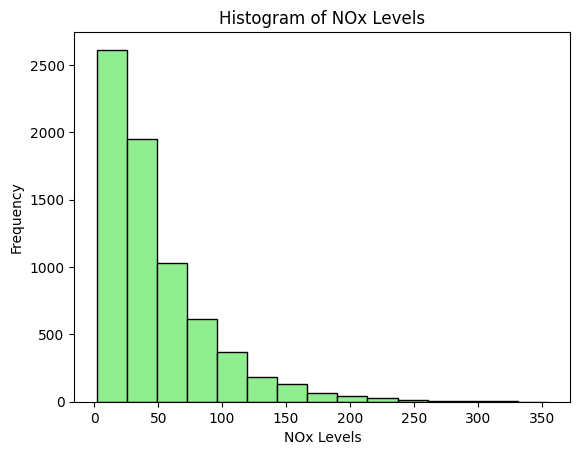

In [5]:
plt.hist(data['NOx'], bins=15, color='lightgreen', edgecolor='black')  # Adjust the number of bins as needed

# Adding labels and title
plt.xlabel('NOx Levels')
plt.ylabel('Frequency')
plt.title('Histogram of NOx Levels')

# Displaying the histogram
plt.show()

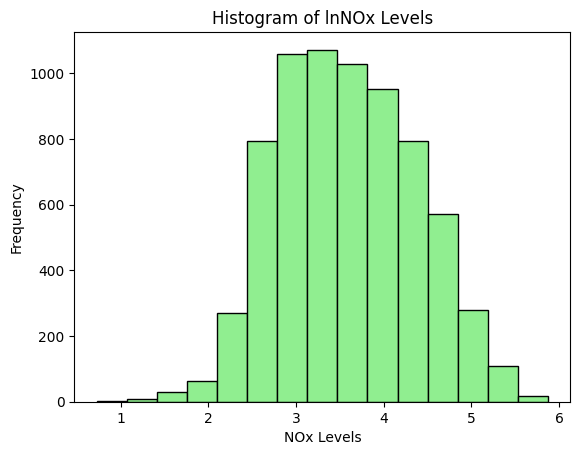

In [6]:
plt.hist(data['lnNOx'], bins=15, color='lightgreen', edgecolor='black')  # Adjust the number of bins as needed

# Adding labels and title
plt.xlabel('NOx Levels')
plt.ylabel('Frequency')
plt.title('Histogram of lnNOx Levels')

# Displaying the histogram
plt.show()

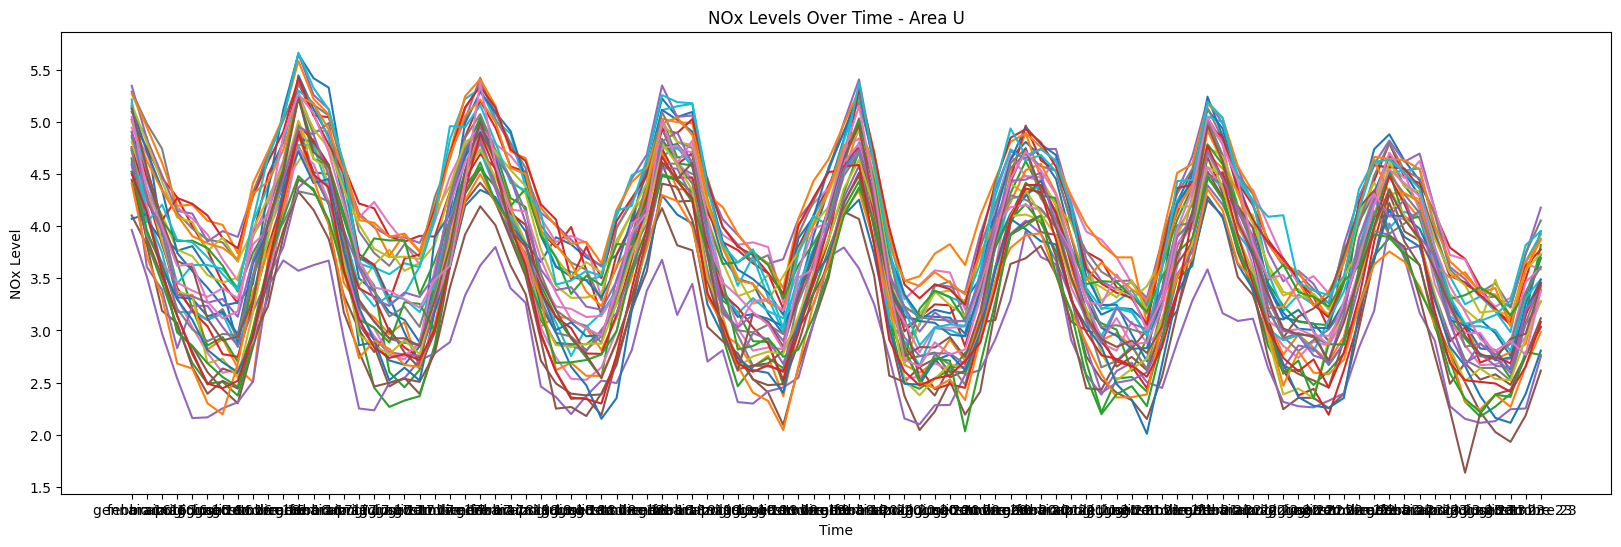

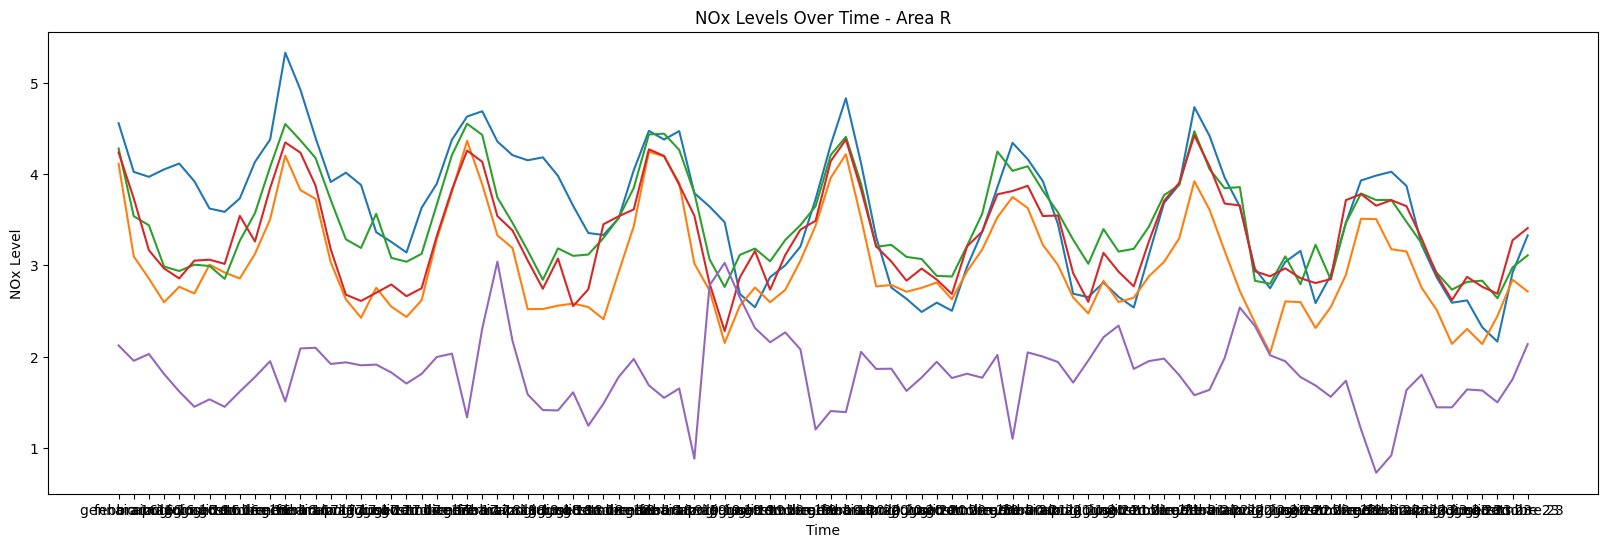

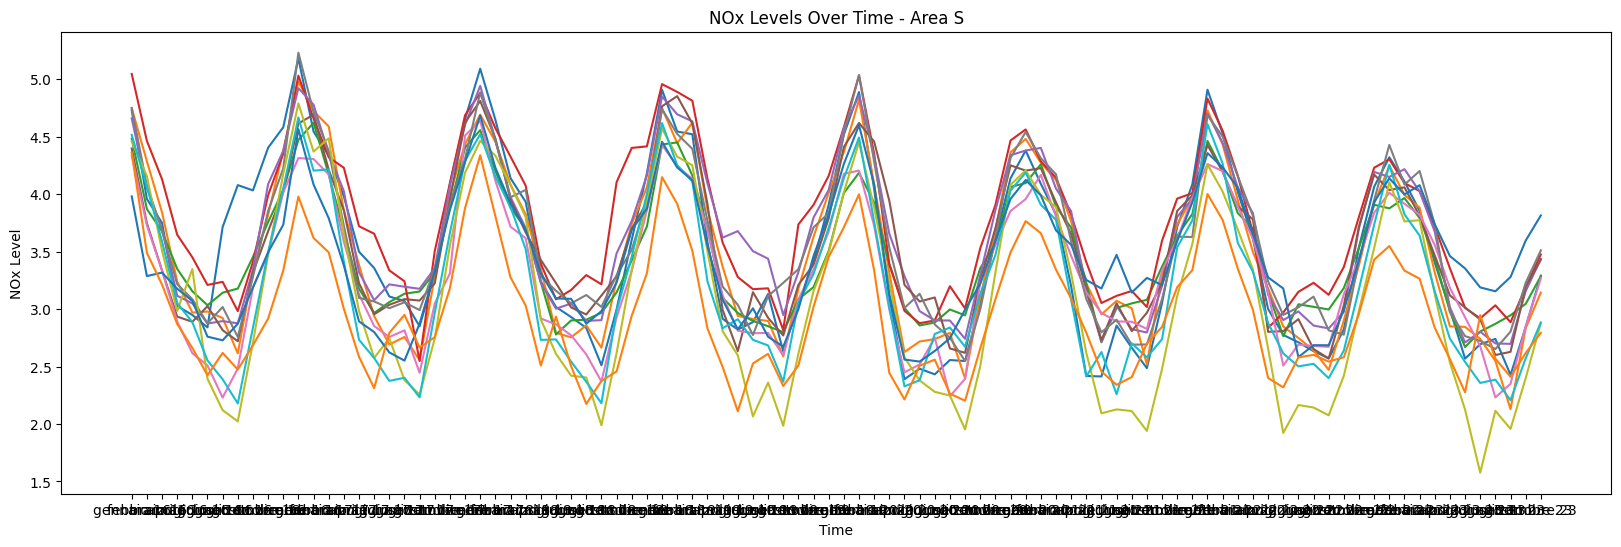

In [ ]:

# Filter data for each area
area_U_data = data[data['area'] == 'U']
area_R_data = data[data['area'] == 'R']
area_S_data = data[data['area'] == 'S']

# Plotting for Area U
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_U_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area U')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.show()

# Plotting for Area R
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_R_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area R')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.show()

# Plotting for Area S
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_S_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area S')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.show()

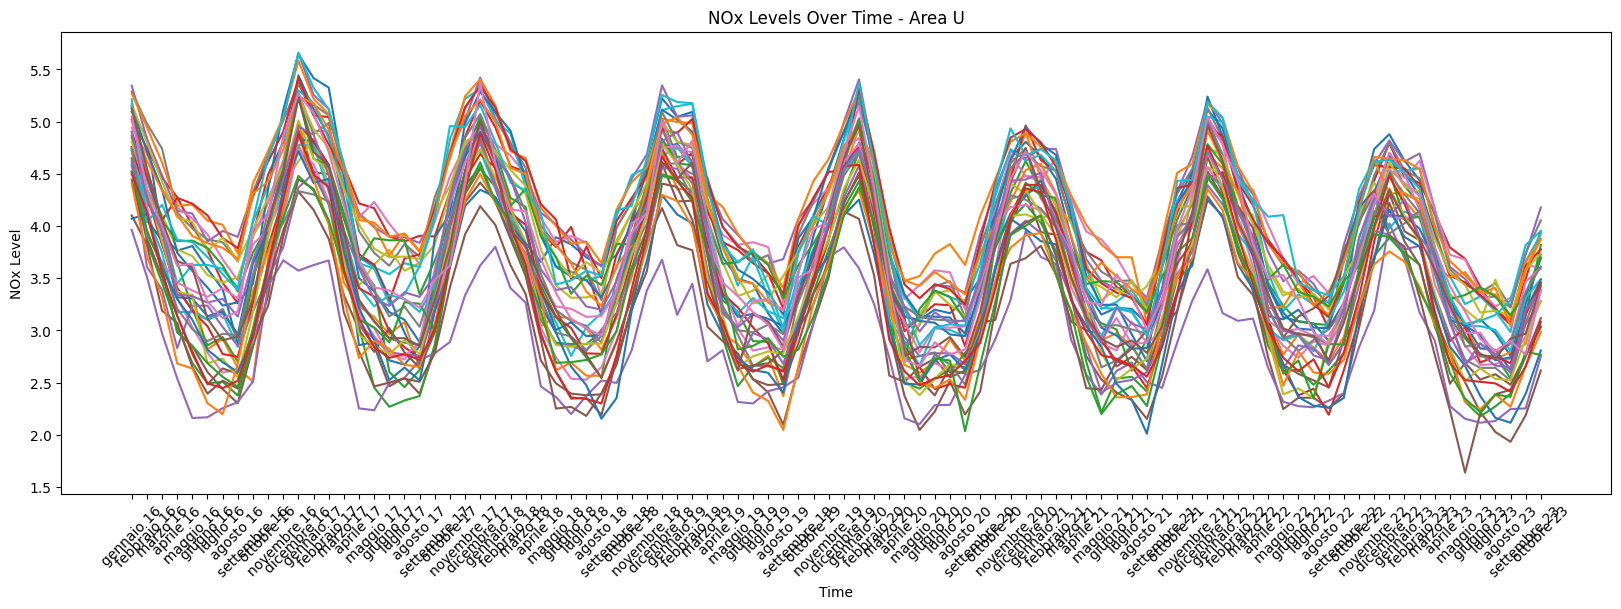

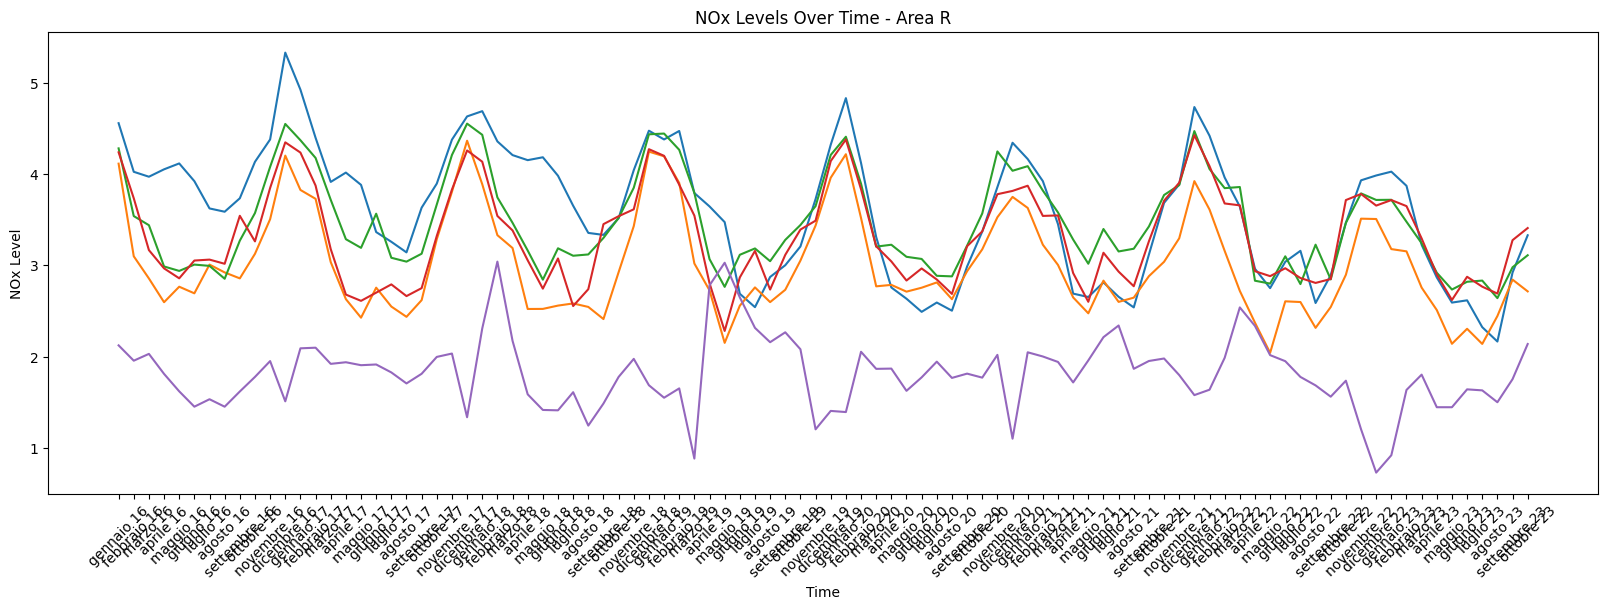

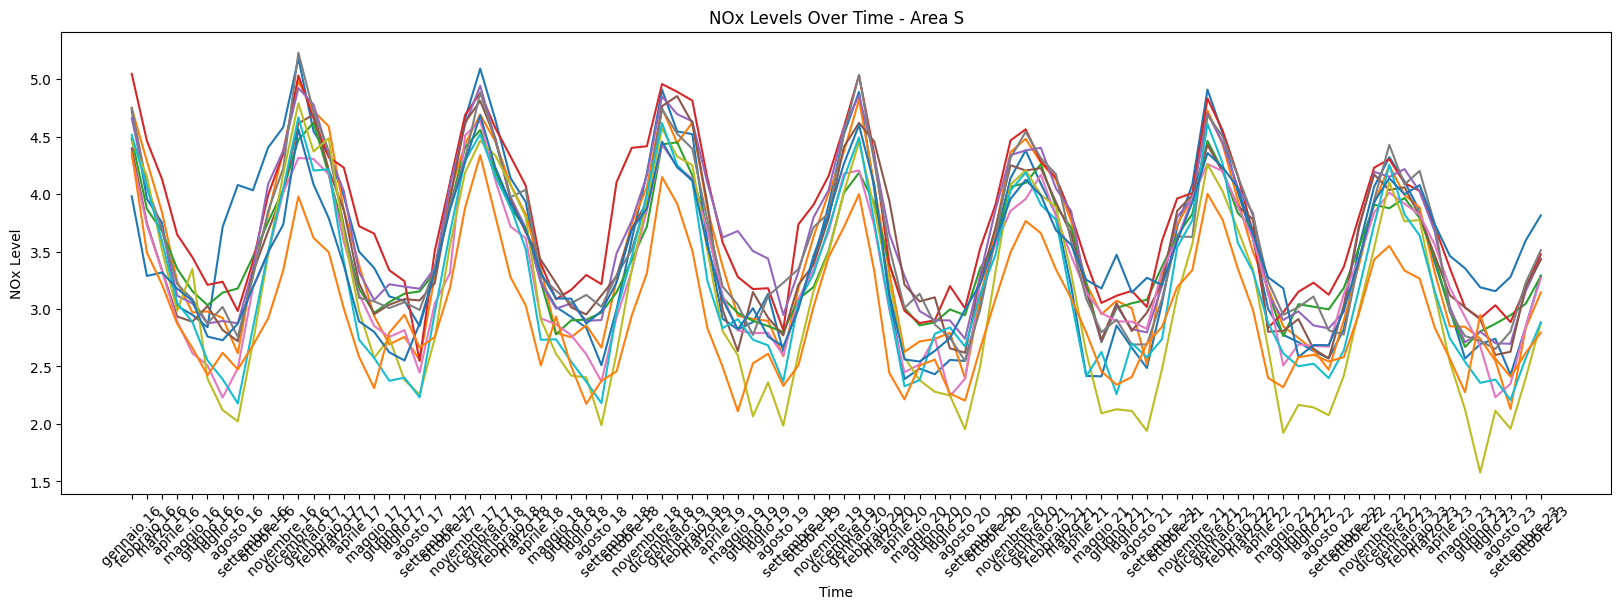

In [7]:
# Define custom month order
month_order = [
    'gennaio 16', 'febbraio 16', 'marzo 16', 'aprile 16', 'maggio 16', 'giugno 16', 'luglio 16', 'agosto 16',
    'settembre 16', 'ottobre 16', 'novembre 16', 'dicembre 16', 'gennaio 17', 'febbraio 17', 'marzo 17',
    'aprile 17', 'maggio 17', 'giugno 17', 'luglio 17', 'agosto 17', 'settembre 17', 'ottobre 17', 'novembre 17',
    'dicembre 17', 'gennaio 18', 'febbraio 18', 'marzo 18', 'aprile 18', 'maggio 18', 'giugno 18', 'luglio 18',
    'agosto 18', 'settembre 18', 'ottobre 18', 'novembre 18', 'dicembre 18', 'gennaio 19', 'febbraio 19', 'marzo 19',
    'aprile 19', 'maggio 19', 'giugno 19', 'luglio 19', 'agosto 19', 'settembre 19', 'ottobre 19', 'novembre 19',
    'dicembre 19', 'gennaio 20', 'febbraio 20', 'marzo 20', 'aprile 20', 'maggio 20', 'giugno 20', 'luglio 20',
    'agosto 20', 'settembre 20', 'ottobre 20', 'novembre 20', 'dicembre 20', 'gennaio 21', 'febbraio 21', 'marzo 21',
    'aprile 21', 'maggio 21', 'giugno 21', 'luglio 21', 'agosto 21', 'settembre 21', 'ottobre 21', 'novembre 21',
    'dicembre 21', 'gennaio 22', 'febbraio 22', 'marzo 22', 'aprile 22', 'maggio 22', 'giugno 22', 'luglio 22',
    'agosto 22', 'settembre 22', 'ottobre 22', 'novembre 22', 'dicembre 22', 'gennaio 23', 'febbraio 23', 'marzo 23',
    'aprile 23', 'maggio 23', 'giugno 23', 'luglio 23', 'agosto 23', 'settembre 23', 'ottobre 23'
]

# Convert 'Time' column to categorical with custom month order
data['Time'] = pd.Categorical(data['Time'], categories=month_order, ordered=True)

# Filter data for each area
area_U_data = data[data['area'] == 'U']
area_R_data = data[data['area'] == 'R']
area_S_data = data[data['area'] == 'S']

# Plotting for Area U
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_U_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area U')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plotting for Area R
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_R_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area R')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plotting for Area S
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in area_S_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Area S')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


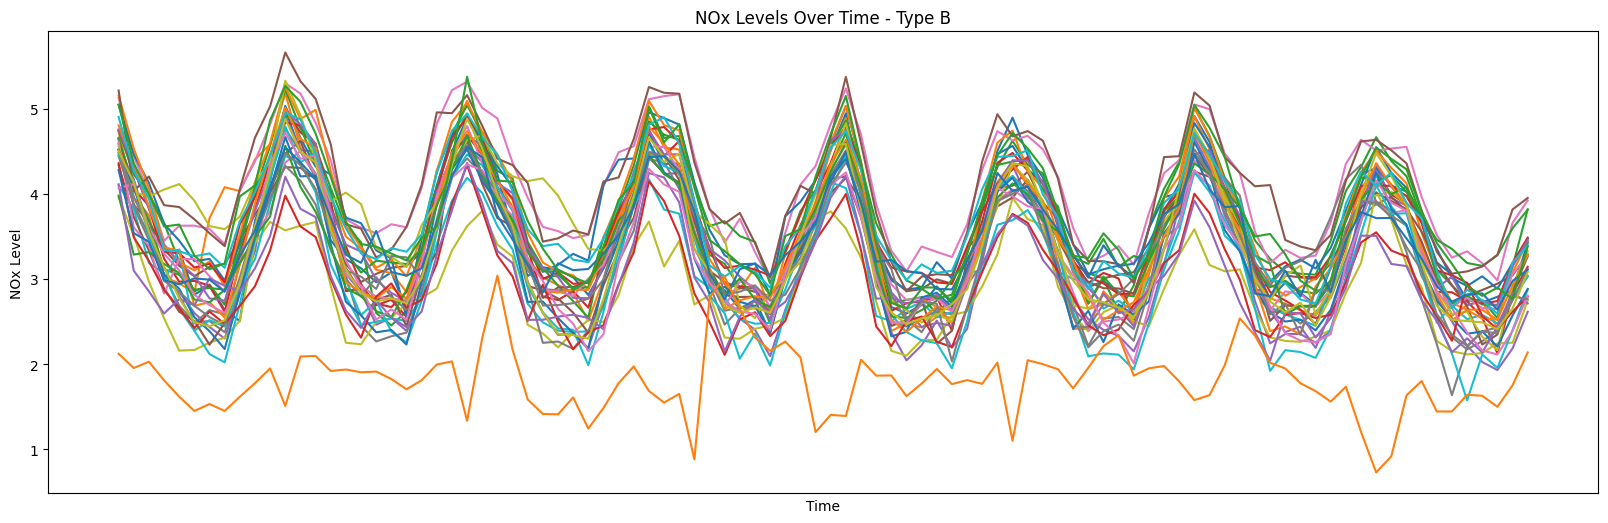

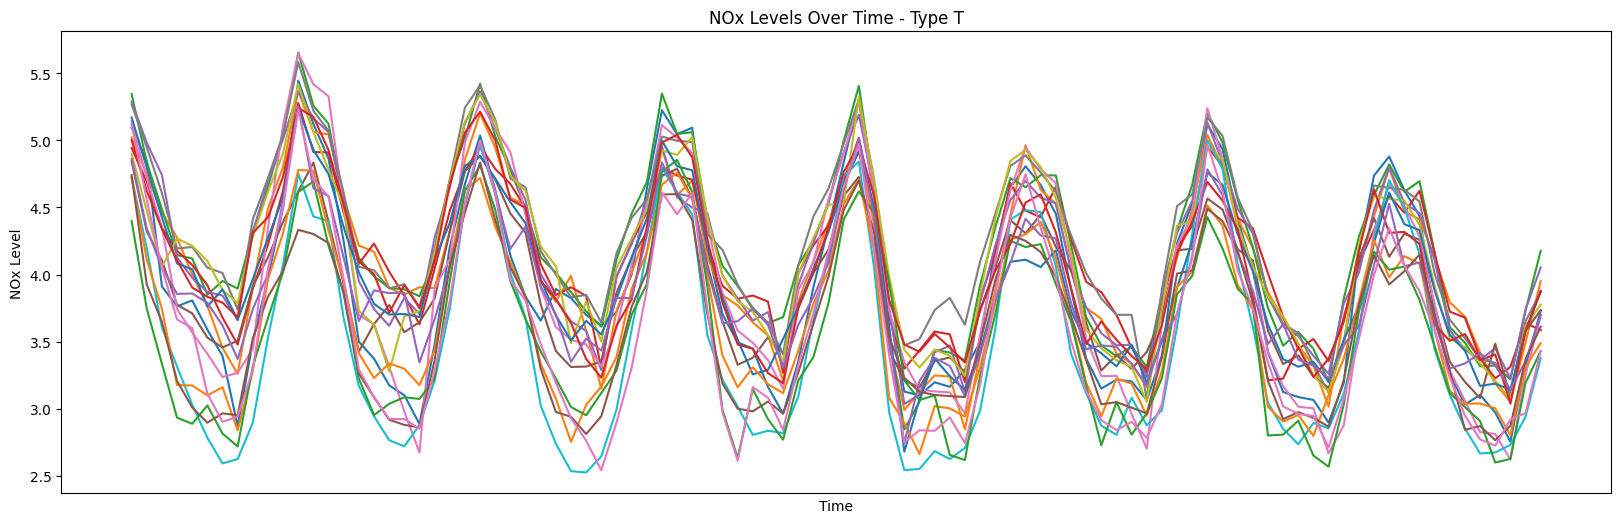

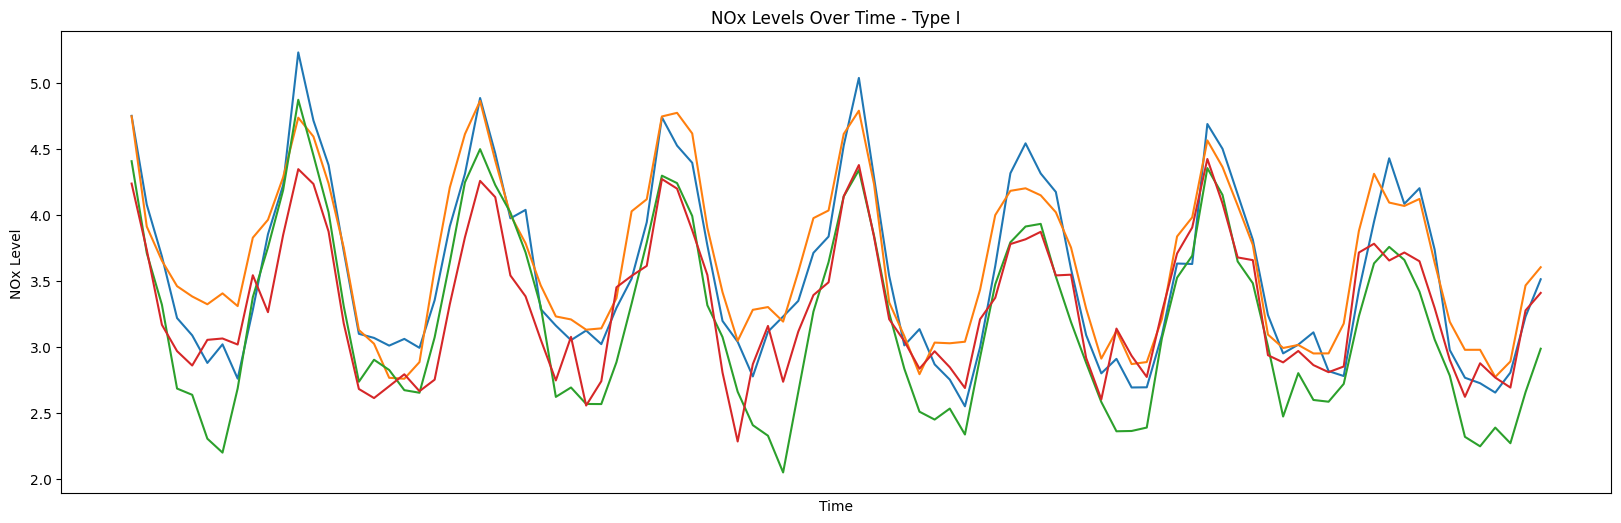

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing time series data
# with columns 'Id_sensor', 'Type', 'Time', 'lnNOx'

# Filter data for each type
type_B_data = data[data['type'] == 'B']
type_T_data = data[data['type'] == 'T']
type_I_data = data[data['type'] == 'I']

# Plotting for Type B
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in type_B_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Type B')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks([])  # Hide the x-axis
plt.show()

# Plotting for Type T
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in type_T_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Type T')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks([])  # Hide the x-axis
plt.show()

# Plotting for Type I
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in type_I_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Type I')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks([])  # Hide the x-axis
plt.show()


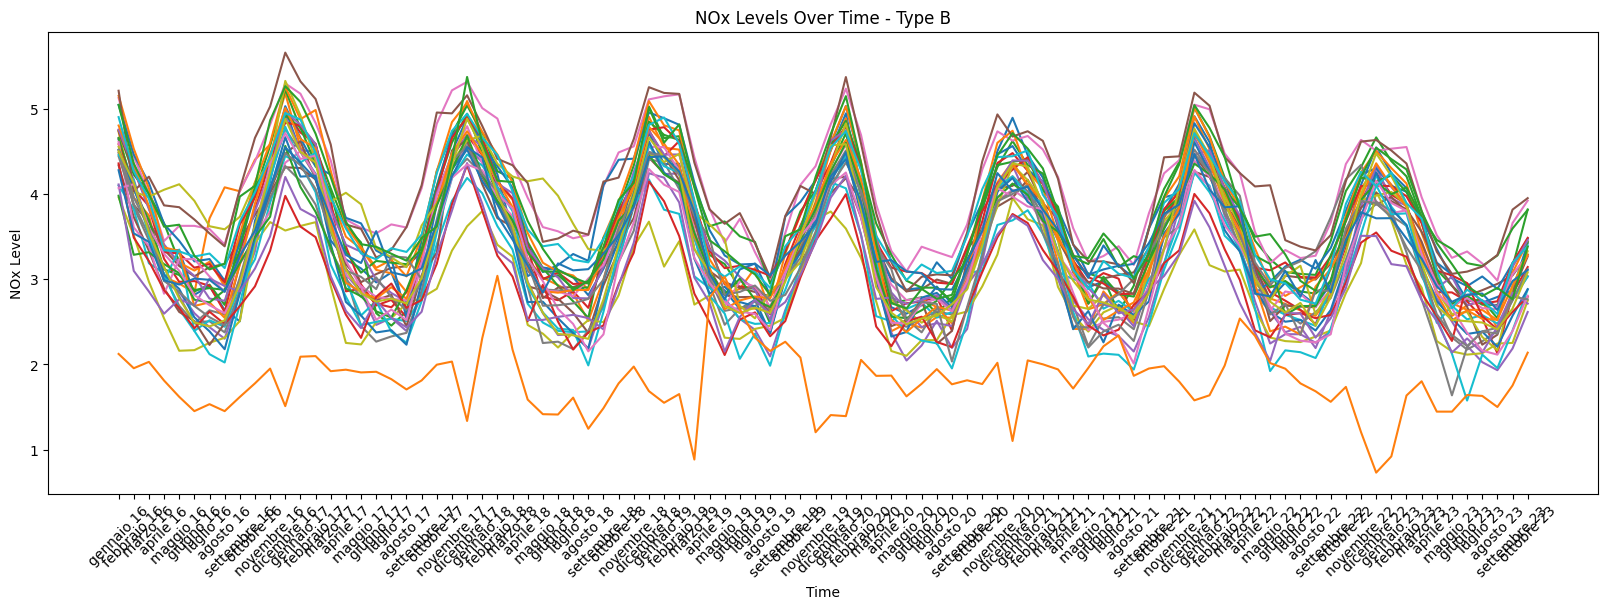

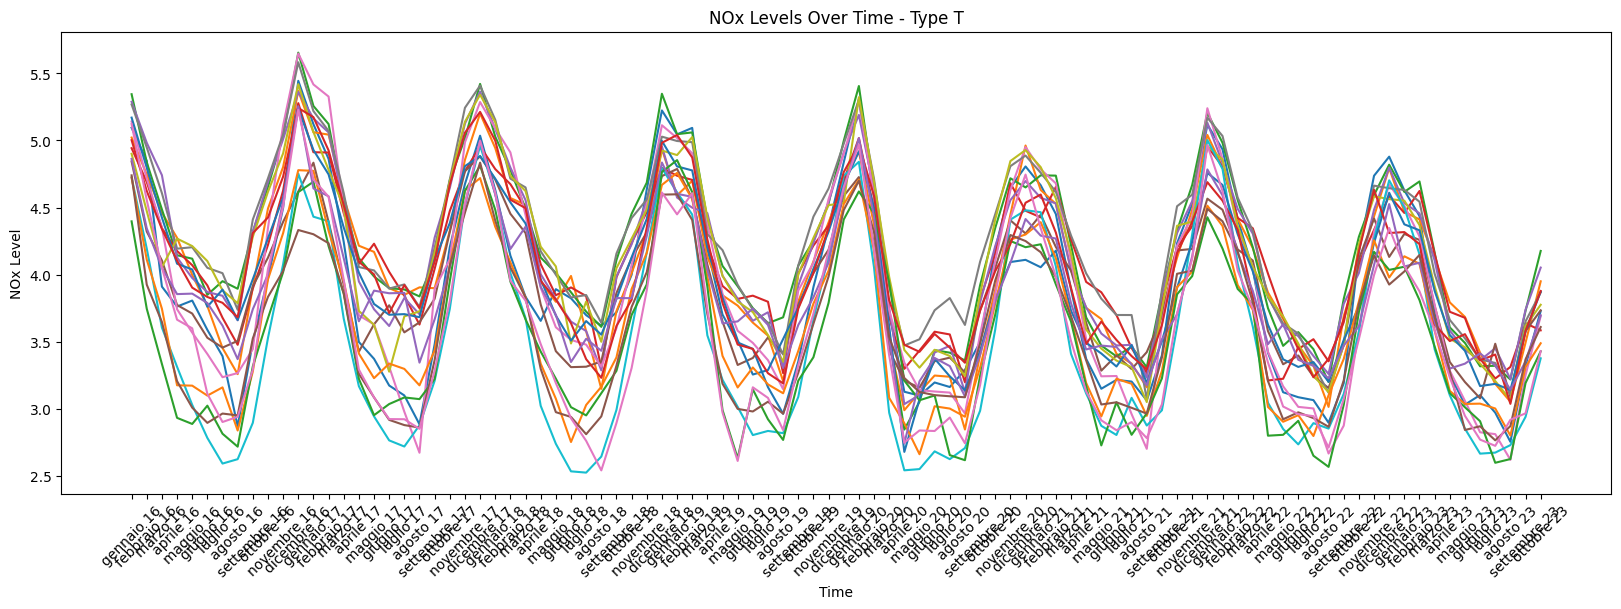

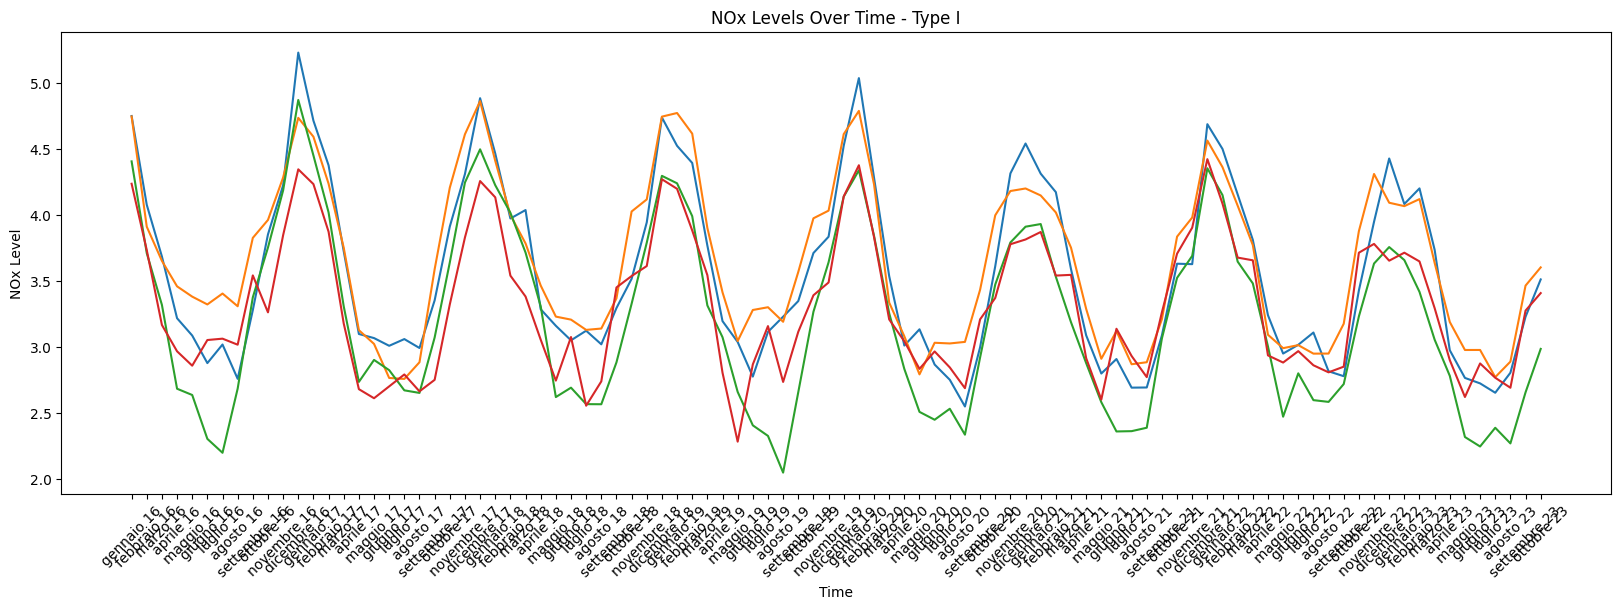

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define custom month order
month_order = [
    'gennaio 16', 'febbraio 16', 'marzo 16', 'aprile 16', 'maggio 16', 'giugno 16', 'luglio 16', 'agosto 16',
    'settembre 16', 'ottobre 16', 'novembre 16', 'dicembre 16', 'gennaio 17', 'febbraio 17', 'marzo 17',
    'aprile 17', 'maggio 17', 'giugno 17', 'luglio 17', 'agosto 17', 'settembre 17', 'ottobre 17', 'novembre 17',
    'dicembre 17', 'gennaio 18', 'febbraio 18', 'marzo 18', 'aprile 18', 'maggio 18', 'giugno 18', 'luglio 18',
    'agosto 18', 'settembre 18', 'ottobre 18', 'novembre 18', 'dicembre 18', 'gennaio 19', 'febbraio 19', 'marzo 19',
    'aprile 19', 'maggio 19', 'giugno 19', 'luglio 19', 'agosto 19', 'settembre 19', 'ottobre 19', 'novembre 19',
    'dicembre 19', 'gennaio 20', 'febbraio 20', 'marzo 20', 'aprile 20', 'maggio 20', 'giugno 20', 'luglio 20',
    'agosto 20', 'settembre 20', 'ottobre 20', 'novembre 20', 'dicembre 20', 'gennaio 21', 'febbraio 21', 'marzo 21',
    'aprile 21', 'maggio 21', 'giugno 21', 'luglio 21', 'agosto 21', 'settembre 21', 'ottobre 21', 'novembre 21',
    'dicembre 21', 'gennaio 22', 'febbraio 22', 'marzo 22', 'aprile 22', 'maggio 22', 'giugno 22', 'luglio 22',
    'agosto 22', 'settembre 22', 'ottobre 22', 'novembre 22', 'dicembre 22', 'gennaio 23', 'febbraio 23', 'marzo 23',
    'aprile 23', 'maggio 23', 'giugno 23', 'luglio 23', 'agosto 23', 'settembre 23', 'ottobre 23'
]

# Convert 'Time' column to categorical with custom month order
data['Time'] = pd.Categorical(data['Time'], categories=month_order, ordered=True)

# Filter data for each type
type_B_data = data[data['type'] == 'B']
type_T_data = data[data['type'] == 'T']
type_I_data = data[data['type'] == 'I']

# Plotting for Type B
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in type_B_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Type B')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plotting for Type T
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in type_T_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Type T')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plotting for Type I
plt.figure(figsize=(20, 6))
for sensor_id, sensor_data in type_I_data.groupby('Id_sensor'):
    plt.plot(sensor_data['Time'], sensor_data['lnNOx'], label=f'Sensor {sensor_id}')

plt.title('NOx Levels Over Time - Type I')
plt.xlabel('Time')
plt.ylabel('NOx Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
numerical_columns_subset = data.iloc[:, 4:18]  # Assuming columns from 4 to 17 inclusive


In [ ]:
import seaborn as sns

# Creating the pairplot
sns.pairplot(numerical_columns_subset)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import seaborn as sns
import numpy as np

# Assuming 'numerical_data_subset' is your DataFrame containing the dataset
# with columns from 4 to 17 representing numerical variables and 'type' column with lowercase 't'
numerical_columns_subset = data.iloc[:, 4:18]  # Assuming columns from 4 to 17 inclusive

# Replace '???' with NaN
numerical_columns_subset.replace('???', np.nan, inplace=True)
# Map 'T', 'B', 'I' to 0, 1, 2 respectively
numerical_columns_subset['type'].replace({'T': 0, 'B': 1, 'I': 2}, inplace=True)





In [ ]:
numerical_columns_subset

max_wind10  avg_wind10  max_wind100  avg_wind100  max_humidity  \
0      -0.883564   -1.033000    -0.448047    -0.632854      0.614262   
1      -0.160893   -0.054538     0.083888     0.459680     -0.152361   
2       0.257496   -0.447750     0.367014    -0.273935     -0.152361   
3      -0.984991   -0.200262    -0.928504    -0.113883     -1.685606   
4      -0.718744   -0.524298    -0.413729    -0.419238     -0.152361   
...          ...         ...          ...          ...           ...   
7045   -0.211607    0.039585    -0.104864    -0.133968     -2.452228   
7046    1.157665    0.046664     0.924688    -0.093503     -0.918983   
7047    1.119629    0.543884     1.156337     0.393464     -1.685606   
7048    0.282852   -0.265388     0.186843    -0.427697     -2.452228   
7049    1.068916    0.379817     1.122018     0.396735      0.614262   

      avg_humidity  max_precipitation  avg_precipitation  max_temperature  \
0         0.775022          -1.041782          -0.924117        -1.442909   
1         0.826117          -0.728737           0.921431        -1.151100   
2         0.137046          -0.656496          -0.462942        -0.884665   
3        -0.319251          -0.776898          -0.648766        -0.415233   
4        -0.147897           0.282639           1.142467         0.143010   
...            ...                ...                ...              ...   
7045     -0.758059           1.823783           0.666983         1.246810   
7046     -0.588039           1.896024           1.480372         1.589369   
7047     -1.492861           1.582979           0.579776         1.665493   
7048     -0.488815           1.005050          -0.007375         0.853502   
7049      0.228141           0.523442           0.502914         0.587068   

      avg_temperature  min_temperature  k_precipitation  k_wind10  type  
0           -1.477609        -1.326712        -0.679566 -1.099549   0.0  
1           -1.064318        -0.978136         0.547807 -0.260883   0.0  
2           -0.804922        -0.911102        -0.434091 -0.959772   0.0  
3           -0.121794        -0.307798        -0.434091 -0.680216   0.0  
4            0.176097         0.013964         1.529706  0.018672   0.0  
...               ...              ...              ...       ...   ...  
7045         1.150379         1.314420         1.529706  0.857338   1.0  
7046         1.434990         1.595962         1.038757  0.997116   1.0  
7047         1.500186         1.153539         0.302333  1.556226   1.0  
7048         1.011922         0.831777        -0.434091  0.018672   1.0  
7049         0.451273         0.469794         0.547807  0.438005   1.0  

[7050 rows x 14 columns]

In [ ]:
# Convert other columns to numeric
#numerical_data_subset = numerical_data_subset.apply(pd.to_numeric)

# Drop rows with missing values
numerical_columns_subset.dropna(inplace=True)

# Creating the pairplot
sns.pairplot(numerical_columns_subset, hue='type')
plt.show()

Output hidden; open in https://colab.research.google.com to view.